In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('billets.csv', sep=';' )

In [3]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [7]:
# Afficher les lignes contenant des valeurs manquantes
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [8]:
# Suppression des valeurs manquantes pour l'entraînement
train_data = df.dropna(subset=['margin_low'])
test_data = df[df['margin_low'].isnull()]

In [9]:
# Sélection des variables explicatives et cible
X_train = train_data[['length', 'height_left', 'height_right', 'margin_up', 'diagonal']]
y_train = train_data['margin_low']

In [10]:
# Ajout d'une constante pour les tests statistiques
X_train_with_const = sm.add_constant(X_train)

In [11]:
# Vérification de la normalité des résidus avant la régression
model_temp = sm.OLS(y_train, X_train_with_const).fit()
residuals = model_temp.resid
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

if shapiro_test.pvalue < 0.05:
    print("Les résidus ne suivent pas une distribution normale. Une transformation des données pourrait être nécessaire.")

Shapiro-Wilk Test: statistic=0.9857882857322693, p-value=8.540482210328548e-11
Les résidus ne suivent pas une distribution normale. Une transformation des données pourrait être nécessaire.


In [12]:
# Test d'homosédasticité (Breusch-Pagan)
bp_test = het_breuschpagan(residuals, X_train_with_const)
print(f"Breusch-Pagan Test: LM Statistic={bp_test[0]}, p-value={bp_test[1]}")

if bp_test[1] < 0.05:
    print("L'hypothèse d'homosédasticité est rejetée. Une correction peut être nécessaire.")

Breusch-Pagan Test: LM Statistic=80.16261280173578, p-value=7.759535216250176e-16
L'hypothèse d'homosédasticité est rejetée. Une correction peut être nécessaire.


In [13]:
# Entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Prédiction des valeurs manquantes
X_test = test_data[['length', 'height_left', 'height_right', 'margin_up', 'diagonal']]
predicted_margin_low = model.predict(X_test)

In [15]:
# Affichage des valeurs prédites
predicted_margin_low

array([3.9342, 4.1553, 4.0904, 4.0495, 5.3284, 4.2367, 4.0102, 4.1558,
       3.9743, 3.9348, 4.0785, 4.0995, 4.1925, 4.1141, 4.0216, 4.1525,
       4.133 , 4.2309, 4.1534, 4.1022, 4.4142, 4.283 , 4.3126, 4.0064,
       4.1495, 4.3112, 4.0515, 4.5153, 4.1122, 5.3144, 5.0016, 5.4252,
       5.472 , 5.2522, 5.0977, 4.8688, 5.3822])

In [16]:
# Remplissage des valeurs manquantes
df.loc[df['margin_low'].isnull(), 'margin_low'] = predicted_margin_low

print("Les valeurs manquantes ont été prédites et remplacées avec succès.")

Les valeurs manquantes ont été prédites et remplacées avec succès.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [18]:
# 5. ACP
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('is_genuine', axis=1))

In [19]:
# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [20]:
explained_variance = pca.explained_variance_ratio_

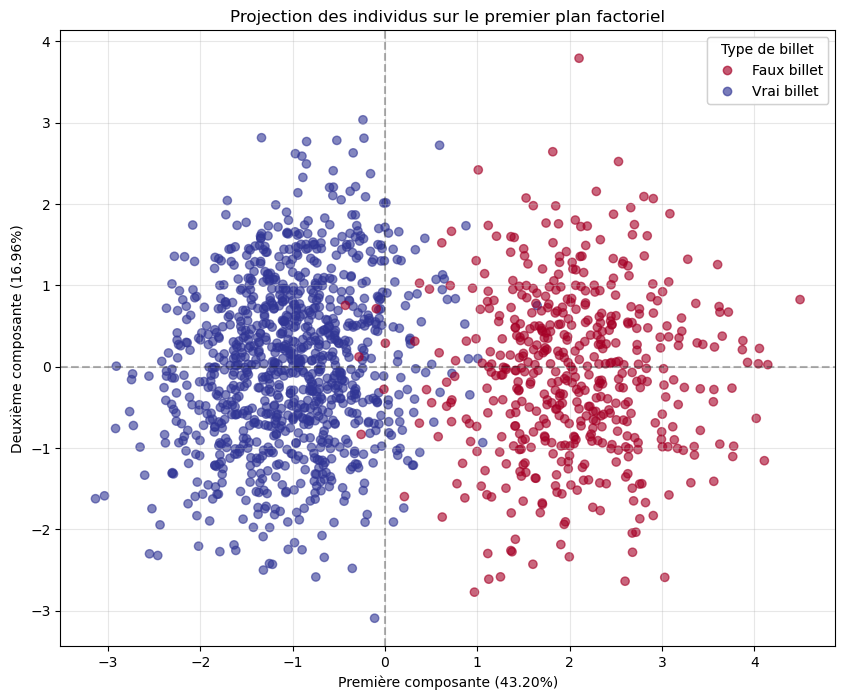

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

# Création du scatter plot avec différentes couleurs selon is_genuine
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                    c=df['is_genuine'],
                    cmap='RdYlBu',
                    alpha=0.6)

# Création d'une légende personnalisée
handles, labels = scatter.legend_elements()
labels = ['Faux billet', 'Vrai billet']  # Labels personnalisés pour la légende
legend1 = ax.legend(handles, labels, loc="upper right", title="Type de billet")
ax.add_artist(legend1)

# Ajout des axes
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Titres et labels
plt.xlabel(f"Première composante ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"Deuxième composante ({explained_variance[1]*100:.2f}%)")
plt.title("Projection des individus sur le premier plan factoriel")
plt.grid(True, alpha=0.3)

plt.show()

# Affichage des coordonnées des individus sur les deux premières composantes
coord_ind = pd.DataFrame(
    X_pca[:, :2],
    columns=['PC1', 'PC2'],
    index=df.index
)

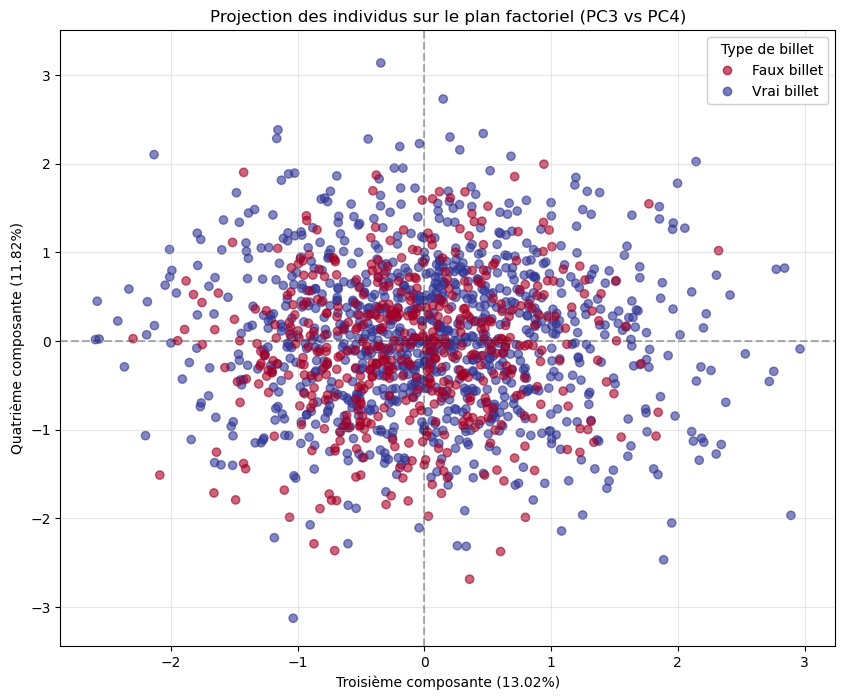

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

# Création du scatter plot avec PC3 et PC4
scatter = ax.scatter(X_pca[:, 2], X_pca[:, 3],
                     c=df['is_genuine'],
                     cmap='RdYlBu',
                     alpha=0.6)

# Création d'une légende personnalisée
handles, labels = scatter.legend_elements()
labels = ['Faux billet', 'Vrai billet']
legend1 = ax.legend(handles, labels, loc="upper right", title="Type de billet")
ax.add_artist(legend1)

# Ajout des axes
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Titres et labels
plt.xlabel(f"Troisième composante ({explained_variance[2]*100:.2f}%)")
plt.ylabel(f"Quatrième composante ({explained_variance[3]*100:.2f}%)")
plt.title("Projection des individus sur le plan factoriel (PC3 vs PC4)")
plt.grid(True, alpha=0.3)

plt.show()

# Affichage des coordonnées sur les composantes 3 et 4
coord_ind_PC34 = pd.DataFrame(
    X_pca[:, 2:4],
    columns=['PC3', 'PC4'],
    index=df.index
)

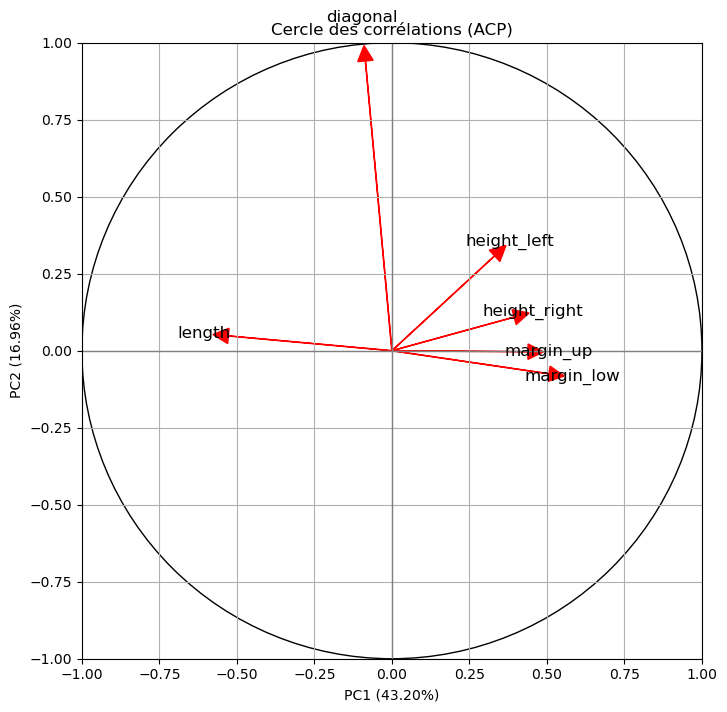

In [23]:
# Préparation des données pour l'ACP
X = df.drop('is_genuine', axis=1)  # On exclut la variable cible
explained_variance = pca.explained_variance_ratio_

# Cercle des corrélations
fig, ax = plt.subplots(figsize=(8, 8))

# Ajouter les axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)

# Tracer le cercle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_patch(circle)

# Coordonnées des variables dans le plan factoriel
components = pca.components_[:2]  # On ne prend que les 2 premières composantes
for i, var in enumerate(X.columns):
    ax.arrow(0, 0, components[0, i], components[1, i], 
             head_width=0.05, head_length=0.05, fc='red', ec='red')
    plt.text(components[0, i]*1.15, components[1, i]*1.15, var, 
             fontsize=12, ha='center', va='center')

# Titres et labels
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("Cercle des corrélations (ACP)")
plt.grid(True)
plt.show()

# Afficher les coordonnées des variables
coord_var = pd.DataFrame(
    components.T,  # Transposée des 2 premières composantes uniquement
    columns=['PC1', 'PC2'],
    index=X.columns
)

In [24]:
# 6. Préparation des données pour les modèles
X = df.drop('is_genuine', axis=1)
feature_names = X.columns.tolist()
y = df['is_genuine']

In [25]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

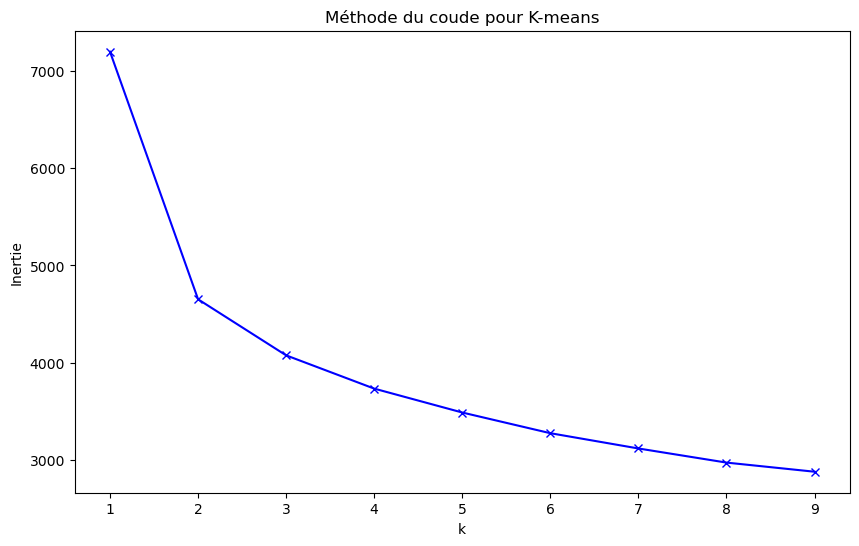

In [27]:
# 7. K-means
# Méthode du coude
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour K-means')
plt.show()

In [28]:
# Application du K-means avec le meilleur k
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)


Résultats pour Logistic Regression:
Accuracy: 0.9933
F1 Score: 0.9948
Precision: 0.9896
Recall: 1.0000


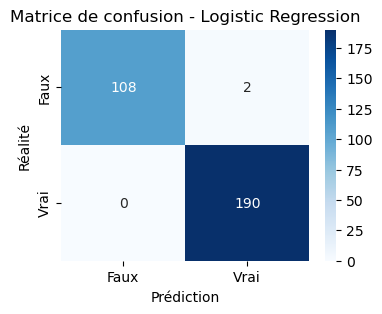


Résultats pour KNN:
Accuracy: 0.9867
F1 Score: 0.9896
Precision: 0.9794
Recall: 1.0000


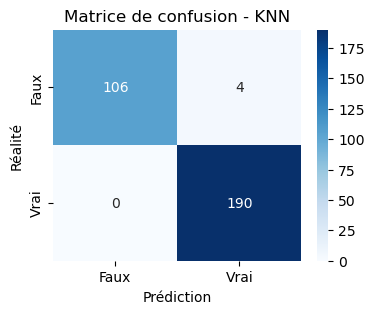


Résultats pour Random Forest:
Accuracy: 0.9900
F1 Score: 0.9922
Precision: 0.9845
Recall: 1.0000


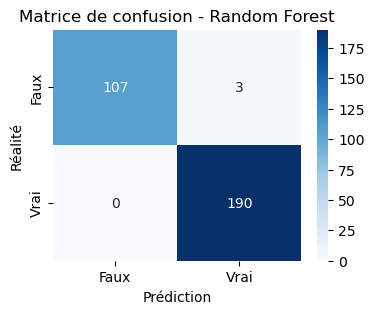


Résultats pour KMeans:
Silhouette Score: 0.3367187933124498


In [29]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KMeans': KMeans(n_clusters=2, random_state=42) 
}

# Dictionnaire pour stocker les résultats et les modèles
results = {}
for name, model in models.items():
    if name == 'KMeans':
        model.fit(X_train_scaled)
        y_pred = model.predict(X_test_scaled)
        silhouette = silhouette_score(X_test_scaled, y_pred)

        results[name] = {
            'model': model,  # Ajout du modèle ici
            'Silhouette Score': silhouette
        }

        print(f"\nRésultats pour {name}:")
        print(f"Silhouette Score: {silhouette}")

    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            'model': model,  # Ajout du modèle ici
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall
        }

        print(f"\nRésultats pour {name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")

        # Heatmap de la matrice de confusion avec les bonnes étiquettes
        cm_labels = ['Faux', 'Vrai']

        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
        plt.title(f"Matrice de confusion - {name}")
        plt.xlabel("Prédiction")
        plt.ylabel("Réalité")
        plt.show()

In [30]:
print("Le modèle Random Forest a été sélectionné pour sa performance équilibrée (accuracy de 0.99, F1-Score de 0.9922) et sa robustesse, offrant un excellent compromis entre précision (0.9845) et recall (1.0) avec seulement 3 faux positifs sur l'ensemble du jeu de test.")

Le modèle Random Forest a été sélectionné pour sa performance équilibrée (accuracy de 0.99, F1-Score de 0.9922) et sa robustesse, offrant un excellent compromis entre précision (0.9845) et recall (1.0) avec seulement 3 faux positifs sur l'ensemble du jeu de test.


In [31]:
def predict_new_bills(filename, model, feature_names):
    """
    Prédit l'authenticité des nouveaux billets
    
    Parameters:
    filename (str): Chemin vers le fichier CSV des nouveaux billets
    model: Modèle entraîné à utiliser pour la prédiction
    feature_names: Liste des noms de colonnes dans l'ordre utilisé pour l'entraînement
    
    Returns:
    DataFrame: Données avec les prédictions
    """
    # Chargement des nouveaux billets
    new_bills = pd.read_csv(filename, sep=',')
    
    # Réorganisation des colonnes dans le même ordre que l'entraînement
    new_bills = new_bills[feature_names]
    
    # Préparation des données
    new_bills_scaled = scaler.transform(new_bills)
    
    # Prédiction
    predictions = model.predict(new_bills_scaled)
    
    # Ajout des prédictions au DataFrame original
    new_bills['is_genuine_predicted'] = predictions
    
    return new_bills

In [33]:
new_predictions = predict_new_bills('billets_test (1).csv', results['Random Forest']['model'], feature_names)
new_predictions.info()
new_predictions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagonal              5 non-null      float64
 1   height_left           5 non-null      float64
 2   height_right          5 non-null      float64
 3   margin_low            5 non-null      float64
 4   margin_up             5 non-null      float64
 5   length                5 non-null      float64
 6   is_genuine_predicted  5 non-null      bool   
dtypes: bool(1), float64(6)
memory usage: 377.0 bytes


,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_predicted
0,172.09,103.95,103.73,4.39,3.09,113.19,True
1,171.52,104.17,104.03,5.27,3.16,111.82,False
2,171.78,103.80,103.75,3.81,3.24,113.39,True
3,172.02,104.08,103.99,5.57,3.30,111.10,False
4,171.79,104.34,104.37,5.00,3.07,111.87,False
